<a href="https://colab.research.google.com/github/SANTHoshN302/-6thSem-ML-Lab-/blob/main/1BM23CS302_Lab2_DataProcessing_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving housing.csv to housing (13).csv
First 10 rows:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252

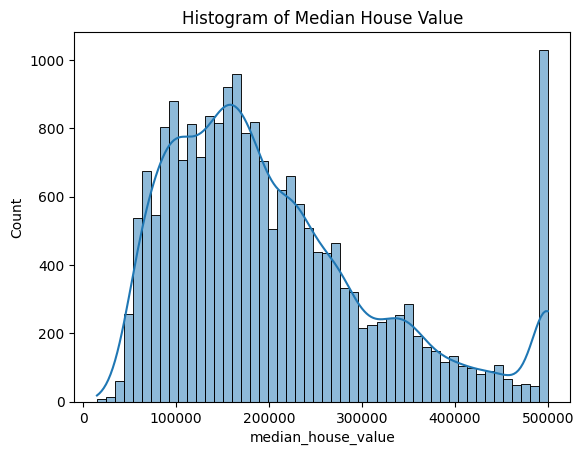

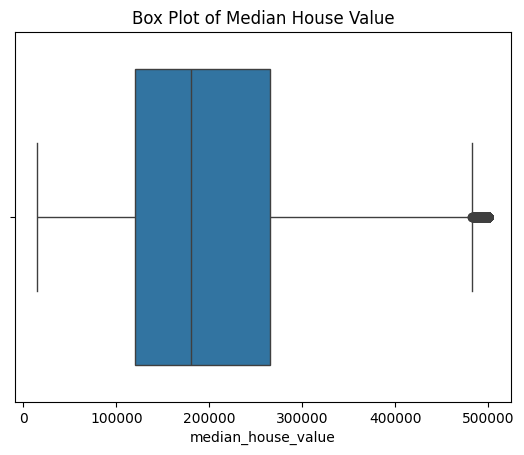


Missing values (%):
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


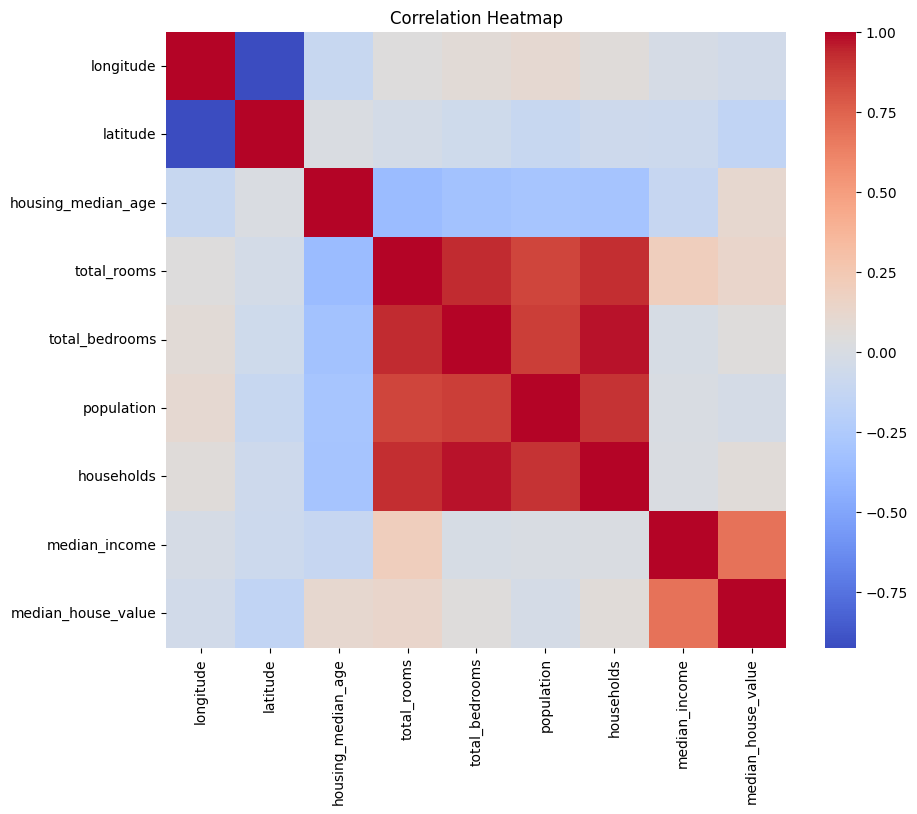

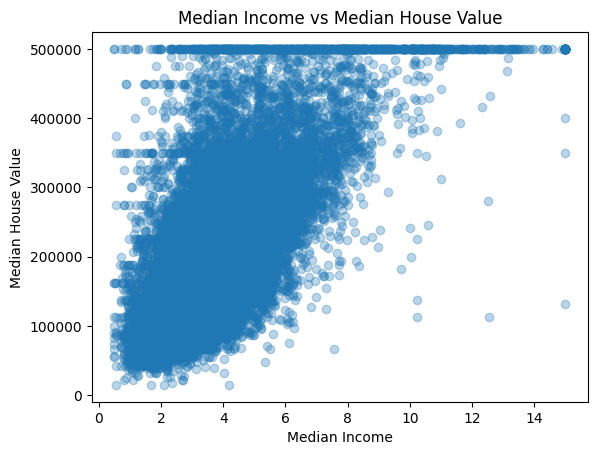


Top 3 Positively Correlated Features:
 median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
Name: median_house_value, dtype: float64

Most Negatively Correlated Feature:
 latitude   -0.14416
Name: median_house_value, dtype: float64

MODEL PERFORMANCE
RMSE: 71133.17349286027
MAE : 51810.48362804262
R2  : 0.6138664756435175


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)


print("First 10 rows:\n", df.head(10))
print( df.dtypes)


print("\nBasic Statistics:\n", df.describe())


plt.figure()
sns.histplot(df["median_house_value"], bins=50, kde=True)
plt.title("Histogram of Median House Value")
plt.show()

plt.figure()
sns.boxplot(x=df["median_house_value"])
plt.title("Box Plot of Median House Value")
plt.show()

missing_percent = df.isnull().mean() * 100
print("\nMissing values (%):\n", missing_percent)


df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())


X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

num_features = X.select_dtypes(include=["float64", "int64"]).columns
cat_features = ["ocean_proximity"]

preprocessor = ColumnTransformer([
    ("num", MinMaxScaler(feature_range=(0, 1)), num_features),
    ("cat", OneHotEncoder(drop="first"), cat_features)
])

X_processed = preprocessor.fit_transform(X)


df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0, 1.5, 3, 4.5, 6, np.inf],
    labels=[1, 2, 3, 4, 5]
)

strat_train, strat_test = train_test_split(
    df,
    test_size=0.2,
    stratify=df["income_cat"],
    random_state=42
)

corr_matrix = df.drop(columns=["income_cat"]).corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


plt.figure()
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House Value")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

corr_target = corr_matrix["median_house_value"].sort_values(ascending=False)
print("\nTop 3 Positively Correlated Features:\n", corr_target[1:4])
print("\nMost Negatively Correlated Feature:\n", corr_target.tail(1))


X_scaled = scaler.fit_transform(
    df[num_features]
)


X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train_s, y_train_s)

y_pred = model.predict(X_test_s)


rmse = np.sqrt(mean_squared_error(y_test_s, y_pred))
mae = mean_absolute_error(y_test_s, y_pred)
r2 = r2_score(y_test_s, y_pred)

print("\nMODEL PERFORMANCE")
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)

